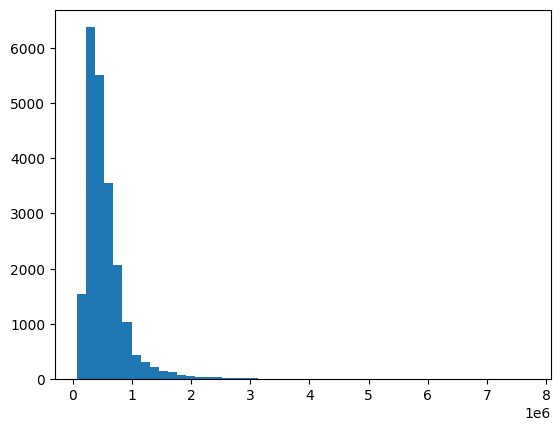


Результаты критерия Колмогорова:
Статистика D_n = 21.423869


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

df = pd.read_csv("resources/kc_house_data.csv")
data = df['price'].values

mu = np.mean(data)
sigma = np.std(data)

plt.hist(df['price'], bins=50)
plt.show()

sorted_data = np.sort(data)
n = len(data)
F_emp = np.arange(1, n + 1) / n
F_theor = norm.cdf(sorted_data, mu, sigma)
D = np.sqrt(n) * np.max(np.abs(F_emp - F_theor))

print(f"\nРезультаты критерия Колмогорова:")
print(f"Статистика D_n = {D:.6f}")

In [18]:
from scipy.stats import kstest

ks_stat, p_value = kstest(data, 'norm', args=(mu, sigma))

alpha = 0.05
if p_value < alpha:
    print(f"ВЫВОД: Отвергаем гипотезу о нормальности (p < {alpha})")
else:
    print(f"ВЫВОД: Нет оснований отвергать нормальность (p ≥ {alpha})")


БИБЛИОТЕЧНЫЙ K-S ТЕСТ:
K-S статистика: 0.145727
P-value: 0.0000000000
ВЫВОД: Отвергаем гипотезу о нормальности (p < 0.05)
